In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

from math import sqrt
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, PolynomialFeatures

from tensorflow import keras
from keras.callbacks import ModelCheckpoint

## 1. Cargando los datos

In [2]:
dataset = pd.read_csv('..\datos_procesados\datos_procesados.csv')
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,0,0,0,1,0,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,0,1,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,0,1,0,2,0,...,0,0,0,0,0,2,2006,0,1,140000
4,60,0,84.0,14260,0,0,1,0,1,0,...,0,0,0,0,0,12,2008,0,0,250000


## 2. Observando la correlación de todos los features con la variable SalePrice

In [3]:
corr_var = dataset.corr()
corr_var_SalePrice = corr_var.loc['SalePrice',:]
corr_var_SalePrice

MSSubClass      -0.088032
MSZoning        -0.110409
LotFrontage      0.344270
LotArea          0.299962
Street          -0.055601
                   ...   
MoSold           0.051568
YrSold          -0.011869
SaleType         0.089236
SaleCondition    0.188314
SalePrice        1.000000
Name: SalePrice, Length: 79, dtype: float64

#### 2.1 Eliminando los features que no tengan una correlación fuerte con la variable SalePrice (correlación < 0.6)

In [4]:
features_sin_correlacion = corr_var_SalePrice[corr_var_SalePrice<0.6].index.to_list()
dataset = dataset.drop(features_sin_correlacion, axis=1)
dataset

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000
...,...,...,...,...,...,...,...
1116,6,953,953,1647,2,460,175000
1117,6,1542,2073,2073,2,500,210000
1118,7,1152,1188,2340,1,252,266500
1119,5,1078,1078,1078,1,240,142125


Se puede apreciar que las variables que tienen una mayor correlación con la variable SalePrice son: OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars y GarageArea

#### 2.2 Mostrando de nuevo la matrix de correlación

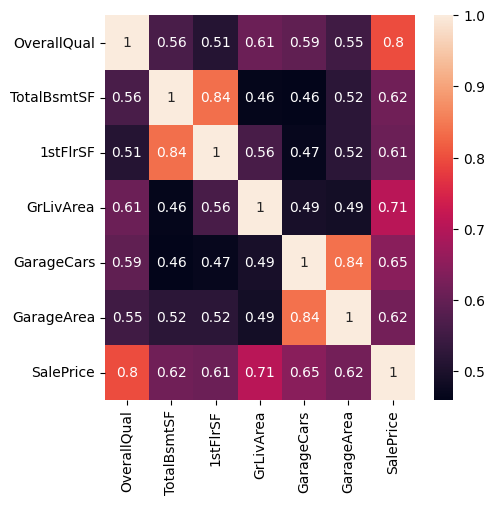

In [5]:
fig = plt.figure(figsize=(5,5))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

## 3. Definiendo los features y la variable a predecir

In [6]:
X = dataset.drop(['SalePrice'], axis=1)
y = dataset[['SalePrice']]

## 4. Se realiza el escalamiento de los datos

In [7]:
esc_rob = RobustScaler()
X_esc = esc_rob.fit_transform(X=X)

## 5. División de los datos en train y test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_esc, y, test_size=0.3, random_state=42)

## 6. Creación del modelo de red neuronal

In [9]:
#Definiendo las capas
entrada         = keras.layers.Input(shape=X_train.shape[1:], name='capa_de_entrada')
capa_oculta_1   = keras.layers.Dense(300, activation='relu', name='capa_oculta_1')(entrada)
capa_oculta_2   = keras.layers.Dense(300, activation='relu', name='capa_oculta_2')(capa_oculta_1)
capa_oculta_3   = keras.layers.Dense(300, activation='relu', name='capa_oculta_3')(capa_oculta_2)
capa_oculta_4   = keras.layers.Dense(300, activation='relu', name='capa_oculta_4')(capa_oculta_3)
capa_oculta_5   = keras.layers.Dense(300, activation='relu', name='capa_oculta_5')(capa_oculta_4)
capa_oculta_6   = keras.layers.Dense(300, activation='relu', name='capa_oculta_6')(capa_oculta_5)
capa_oculta_7   = keras.layers.Dense(300, activation='relu', name='capa_oculta_7')(capa_oculta_6)
capa_oculta_8   = keras.layers.Dense(300, activation='relu', name='capa_oculta_8')(capa_oculta_7)
capa_oculta_9   = keras.layers.Dense(300, activation='relu', name='capa_oculta_9')(capa_oculta_8)
capa_oculta_10   = keras.layers.Dense(300, activation='relu', name='capa_oculta_10')(capa_oculta_9)
# capa_oculta_11   = keras.layers.Dense(300, activation='relu', name='capa_oculta_11')(capa_oculta_10)
# capa_oculta_12   = keras.layers.Dense(300, activation='relu', name='capa_oculta_12')(capa_oculta_11)
# capa_oculta_13   = keras.layers.Dense(300, activation='relu', name='capa_oculta_13')(capa_oculta_12)
# capa_oculta_14   = keras.layers.Dense(300, activation='relu', name='capa_oculta_14')(capa_oculta_13)
# capa_oculta_15   = keras.layers.Dense(300, activation='relu', name='capa_oculta_15')(capa_oculta_14)
# capa_oculta_16   = keras.layers.Dense(300, activation='relu', name='capa_oculta_16')(capa_oculta_15)
# capa_oculta_17   = keras.layers.Dense(300, activation='relu', name='capa_oculta_17')(capa_oculta_16)
# capa_oculta_18   = keras.layers.Dense(300, activation='relu', name='capa_oculta_18')(capa_oculta_17)
# capa_oculta_19   = keras.layers.Dense(300, activation='relu', name='capa_oculta_19')(capa_oculta_18)
# capa_oculta_20   = keras.layers.Dense(300, activation='relu', name='capa_oculta_20')(capa_oculta_19)
salida          = keras.layers.Dense(1, activation='linear', name='capa_de_salida')(capa_oculta_10)

#Creando el modelo
modelo = keras.Model(inputs=[entrada], outputs=[salida])

## 7. Compilando el modelo

In [10]:
modelo.compile(
    loss = 'huber_loss',
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
)

## 8. Entrenando el modelo

In [11]:
checkpoint = ModelCheckpoint(
    filepath='..\modelos_guardados\modelo_redes_neuronales.h5',
    monitor='val_loss',
    save_best_only=True
)

history = modelo.fit(X_train, y_train, epochs=400, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/400
20/20 [==============================] - 2s 39ms/step - loss: 186045.5312 - val_loss: 169683.9688
Epoch 2/400
20/20 [==============================] - 0s 20ms/step - loss: 186043.5781 - val_loss: 169677.1094
Epoch 3/400
20/20 [==============================] - 0s 20ms/step - loss: 186007.6406 - val_loss: 169551.8750
Epoch 4/400
20/20 [==============================] - 0s 20ms/step - loss: 185398.7188 - val_loss: 167544.3281
Epoch 5/400
20/20 [==============================] - 0s 21ms/step - loss: 177037.7812 - val_loss: 143432.9375
Epoch 6/400
20/20 [==============================] - 0s 21ms/step - loss: 108798.8281 - val_loss: 73826.5078
Epoch 7/400
20/20 [==============================] - 0s 20ms/step - loss: 56662.7305 - val_loss: 60133.0273
Epoch 8/400
20/20 [==============================] - 0s 21ms/step - loss: 50465.9727 - val_loss: 56517.1211
Epoch 9/400
20/20 [==============================] - 0s 21ms/step - loss: 46944.0938 - val_loss: 53621.6484
Epoch 10/400
20/2

## 9. Se carga el mejor modelo entrenado

In [12]:
modelo = keras.models.load_model('..\modelos_guardados\modelo_redes_neuronales.h5')

## 10. Evaluación del modelo

In [13]:
modelo.evaluate(X_test, y_test)

11/11 [==============================] - 0s 4ms/step - loss: 22563.2949


22563.294921875

In [14]:
y_pred = modelo.predict(X_test)

r2_score(y_pred=y_pred, y_true=y_test)

11/11 [==============================] - 0s 8ms/step


0.854003542477317

## 11. Visualizando los resultados

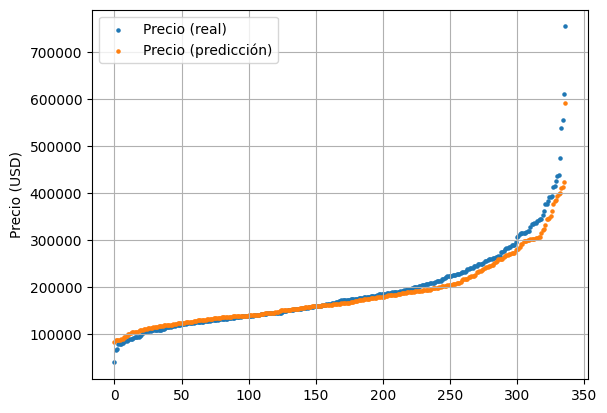

In [15]:
y_t = y_test.values

y_t.sort(axis=0)
y_pred.sort(axis=0)

x = range(y_t.size)

plt.scatter(x, y_t, s=5, label='Precio (real)')
plt.scatter(x, y_pred, s=5, label='Precio (predicción)')
plt.ylabel('Precio (USD)')
plt.grid()
plt.legend()
plt.show()